# Homework 4

The goal of this assignment was to learn how to identify a small subset of a dataset using
unsupervised and supervised methods, and then check the accuracy of our methods by comparing against the ground truth labels

### Importing libraries and reading in the data

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [20]:
mat = scipy.io.loadmat('annthyroid.mat')
df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
X_whole = df.iloc[:,[0,1,2,3,4,5]]
y_whole = df.iloc[:,6]

### Task 1: Visualization
#### 1.1 Visualize the univariate distributions of all features, jointly and per class.
Below is the univariate distributions of all features per class

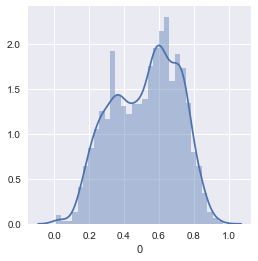

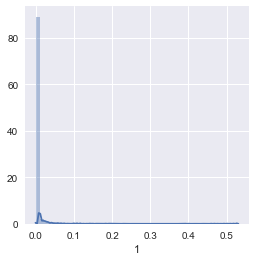

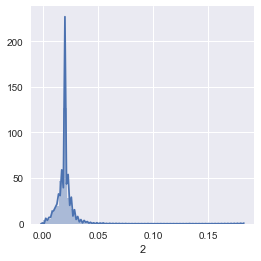

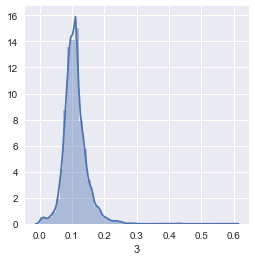

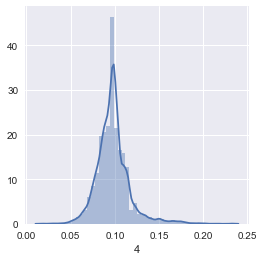

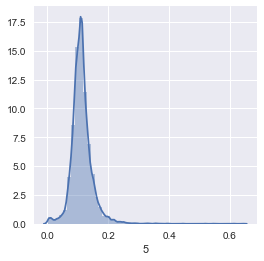

In [216]:
import seaborn as sns

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,0])
plt.show()

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,1])
plt.show()

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,2])
plt.show()

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,3])
plt.show()

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,4])
plt.show()

plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,5])
plt.show()

And below is the joint univariate distribution of all the features (I took this to mean a transposed graph of the previous univariate distributions).

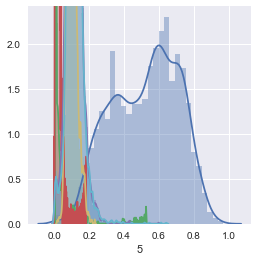

In [217]:
plt.figure(figsize=(4,4))
sns.set(color_codes=True)
sns.distplot(X_whole.iloc[:,0])
sns.distplot(X_whole.iloc[:,1])
sns.distplot(X_whole.iloc[:,2])
sns.distplot(X_whole.iloc[:,3])
sns.distplot(X_whole.iloc[:,4])
sns.distplot(X_whole.iloc[:,5])
plt.show()

#### Visualize the data using PCA (first two principal components).

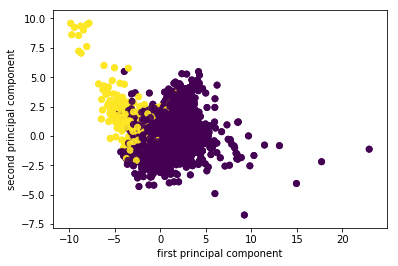

In [30]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X_whole)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y_whole, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

#### Plot the explained variance ratio in PCA. What would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data to compress it?

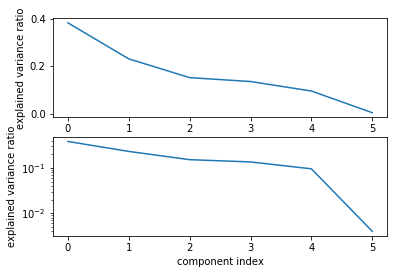

In [48]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_whole, y_whole)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")
    
plt.show()

It looks like 3 appears to be a good threshold for the number of principal components if you wanted to sufficiently reduce the dimensionality of the data to compress it. After the first three components, there is only about 20% of the variance left to explain.

#### 1.2 Visualize the data using t-SNE. See if tuning the perplexity parameter helps obtaining a better visualization.

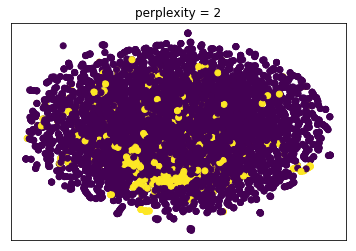

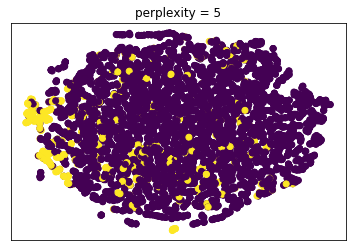

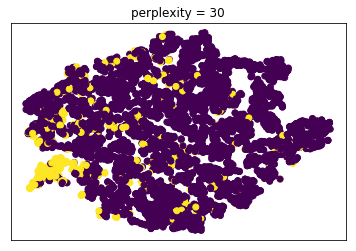

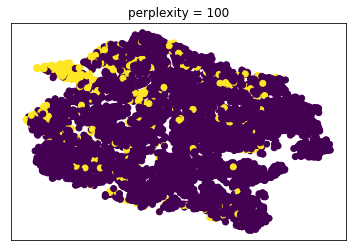

In [54]:
X_scaled = StandardScaler().fit_transform(X_whole)
for perplexity in [2, 5, 30, 100]:
    plt.figure()
    plt.xticks(())
    plt.yticks(())
    X_tsne = TSNE(perplexity=perplexity).fit_transform(X_scaled)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= y_whole)
    plt.title("perplexity = {}".format(perplexity))
    plt.show()

It doesn't look like visualization with t-SNE is particularly helpful, but the best perplexity setting is 30, which aligns with the claim by the creators of t-SNE (that 30 is the best perplexity parameter setting).

### Task 2: Clustering
#### 2.1: Use KMeans, Agglomerative Clustering (with ward linkage) and DBSCAN to cluster the data. 
For each algorithm, try to manually tune the parameters for a reasonable outcome and document how you tuned the parameters. In particular pay attention to the sizes of the clusters created. Create a dendrogram for agglomerative clustering (the truncate_mode='level' might be useful). Manually inspect the outcomes as good as you can and identify if any of the resulting clusters are meaningful (as far as you can tell).

#### KMeans Clustering:

In [105]:
def scatter_tab(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)
    
X_scaled = StandardScaler().fit_transform(X_whole)

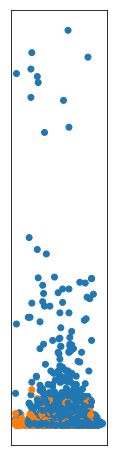

In [106]:
plt.figure(figsize=(2,8))
km = KMeans(n_clusters=2, random_state=0)
km.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

It doesn't look like 2 clusters is enough to distinguish, which makes intuitive sense.

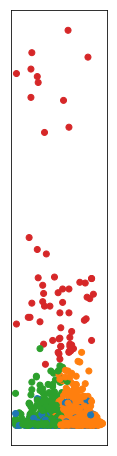

In [107]:
plt.figure(figsize=(2,8))
km = KMeans(n_clusters=4, random_state=0)
km.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

With a cluster size of 4, we are now able to pick out the outliers and somewhat parse between the giant blob on the bottom, although the orange and green are separated well (although should they be separated?), the blue is not as easily distinguished.

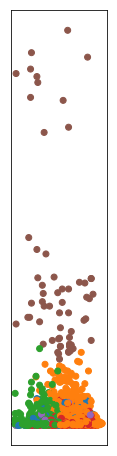

In [118]:
plt.figure(figsize=(8,8))
km = KMeans(n_clusters=6, random_state=0)
km.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

Above we see what happens when the cluster size is increased to 6. I would argue that 6 clusters is too much because while the outliers at the top are still identified, there is a mass of overlapping color on the bottom. Therefore I think that 4 clusters seems to be the right size for KMeans, based on relative cluster size (each cluster does not seem too big), and ability to identify outlying points without overlapping too much.

#### Agglomerative Clustering

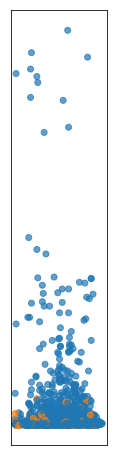

In [119]:
plt.figure(figsize=(8,8))
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, alpha=.7)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

Clearly 2 clusters is not going to be enough for this dataset ( I should probably stop trying it, but I need a baseline to work from).

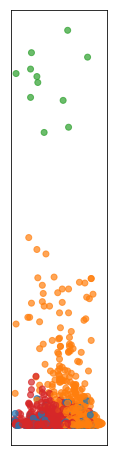

In [120]:
plt.figure(figsize=(8,8))
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, alpha=.7)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

It's interesting to note that with 4 clusters, agglomerative clustering is separating the outliers in the dataset differently compared to the KMeans algorithm. Fewer of the points are added to the outlier cluster in agglomerative than in KMeans. The way it separates the big blob at the bottom into two clusters is less symmetric as well (compared to KMeans). I'm not sure what the blue cluster is, though, and whether or not any of the red/orange/blue clusters are meaningful.

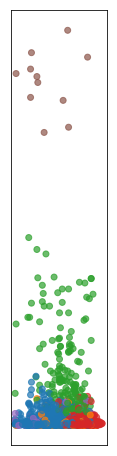

In [123]:
plt.figure(figsize=(8,8))
agg = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, alpha=.7)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

Again, 6 clusters seems like too many since the bottom of the graph is just a mish-mosh of color. It is interesting to see how the upper points are now separated into two groups: green for close outliers and brown for very far outliers. Cluster size seems reasonable, if not a bit small.

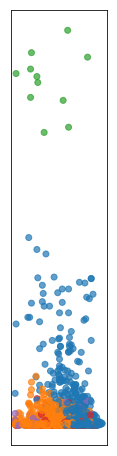

In [124]:
plt.figure(figsize=(8,8))
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_scaled)
scatter_tab(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, alpha=.7)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

I just wanted to experiment with dropping the number of clusters to 5, and the results are interesting. I don't know what the purple/red clusters are, or why the closer outliers are classified as blue points instead of orange points, but I would say that 4 or 5 clusters appears to be the right number.

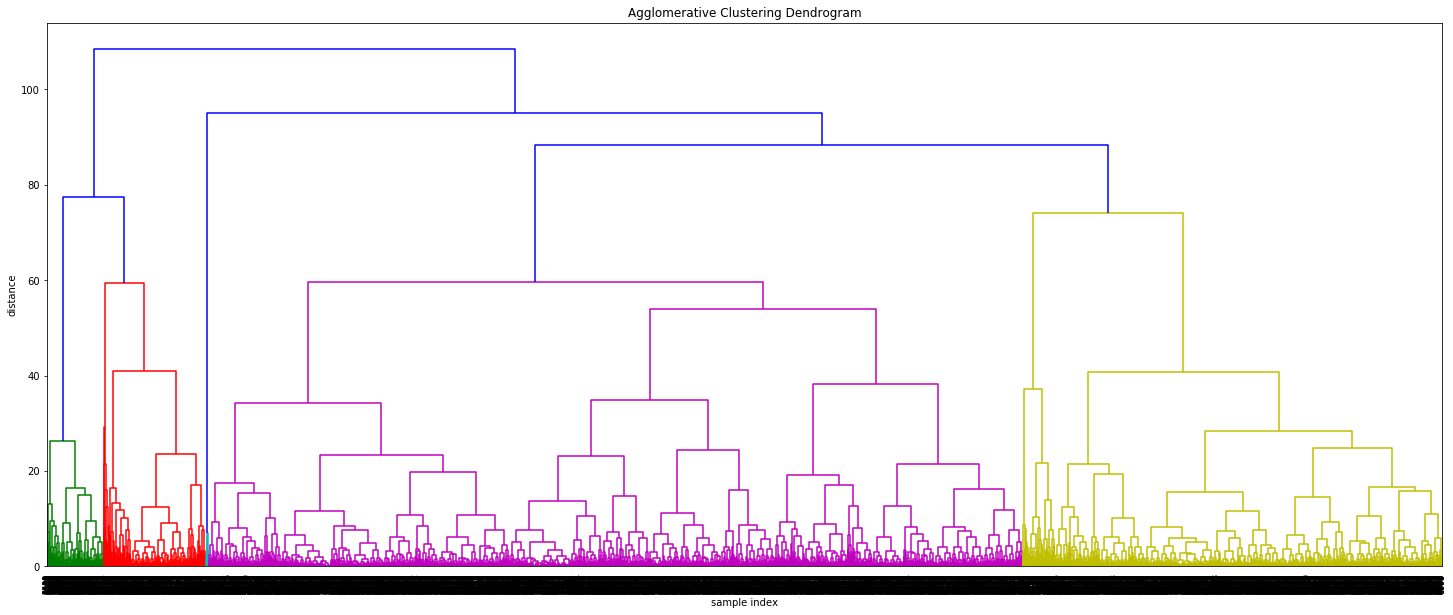

In [128]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, ward

Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


The dendogram appears to confirm that 5 clusters is the right number.

#### DBSCAN
Below I play with the DBSCAN parameters to see how tuning eps and min_samples affects the cluster sizes.

min_samples: 8 eps: 1.000000  cluster: [0 0 0 ..., 0 0 0]


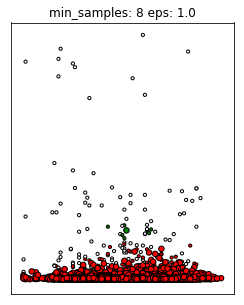

In [131]:
min_samples = 8
eps = 1
plt.figure(figsize=(4, 5))
dbscan = DBSCAN(min_samples=min_samples, eps=eps)
colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']
# get cluster assignments
clusters = dbscan.fit_predict(X_scaled)
print("min_samples: %d eps: %f  cluster: %s"
      % (min_samples, eps, clusters))
if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1
else:
    c = colors
    m = markers
c = np.array(c)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=c[clusters], s=10, edgecolor="k")
inds = dbscan.core_sample_indices_
# vizualize core samples and clusters.
if len(inds):
    plt.scatter(X_scaled[inds, 0], X_scaled[inds, 1], c=c[clusters[inds]],
                     s=30, edgecolor="k")
plt.title("min_samples: %d eps: %.1f"
                     % (min_samples, eps))
plt.xticks(())
plt.yticks(())
plt.show()

min_samples: 16 eps: 0.500000  cluster: [ 0 -1 -1 ...,  0  0  0]


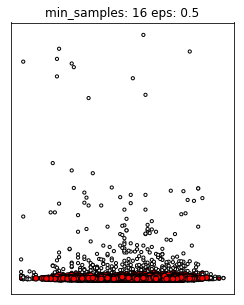

In [137]:
min_samples = 16
eps = 0.5
plt.figure(figsize=(4, 5))
dbscan = DBSCAN(min_samples=min_samples, eps=eps)
colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']
# get cluster assignments
clusters = dbscan.fit_predict(X_scaled)
print("min_samples: %d eps: %f  cluster: %s"
      % (min_samples, eps, clusters))
if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1
else:
    c = colors
    m = markers
c = np.array(c)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=c[clusters], s=10, edgecolor="k")
inds = dbscan.core_sample_indices_
# vizualize core samples and clusters.
if len(inds):
    plt.scatter(X_scaled[inds, 0], X_scaled[inds, 1], c=c[clusters[inds]],
                     s=30, edgecolor="k")
plt.title("min_samples: %d eps: %.1f"
                     % (min_samples, eps))
plt.xticks(())
plt.yticks(())
plt.show()

min_samples: 4 eps: 2.000000  cluster: [0 0 0 ..., 0 0 0]


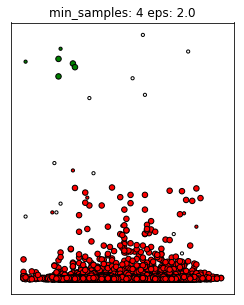

In [141]:
min_samples = 4
eps = 2
plt.figure(figsize=(4, 5))
dbscan = DBSCAN(min_samples=min_samples, eps=eps)
colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']
# get cluster assignments
clusters = dbscan.fit_predict(X_scaled)
print("min_samples: %d eps: %f  cluster: %s"
      % (min_samples, eps, clusters))
if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1
else:
    c = colors
    m = markers
c = np.array(c)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=c[clusters], s=10, edgecolor="k")
inds = dbscan.core_sample_indices_
# vizualize core samples and clusters.
if len(inds):
    plt.scatter(X_scaled[inds, 0], X_scaled[inds, 1], c=c[clusters[inds]],
                     s=30, edgecolor="k")
plt.title("min_samples: %d eps: %.1f"
                     % (min_samples, eps))
plt.xticks(())
plt.yticks(())
plt.show()

 It seems, based on the visual output from each attempt, that the eps and min_sample parameter settings on the middle attempt (min_samples = 16, eps = 0.5) yielded the most understandable results. There was a cluster of red inliers at the bottom, and then anything slightly too far from the center was marked an outlier. I can't tell if I like this best because it makes sense with the (0,1) labelling I know exists with this dataset, so I may be presenting a bit of confirmation bias.

#### 2.2: Use the known ground truth labels of the outlier vs inlier class to evaluate your clustering approaches using NMI and ARI scores. 
How well did they do? Can you adjust parameters so they can detect the outliers better?

#### KMeans

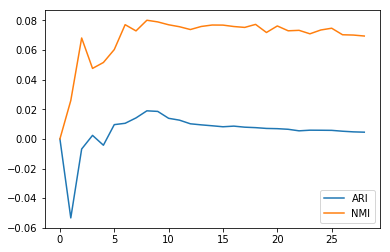

In [204]:
aris, nmis = [], []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(X_scaled)
    ari = adjusted_rand_score(y_whole, km.labels_)
    nmi = normalized_mutual_info_score(y_whole, km.labels_)
    aris.append(ari)
    nmis.append(nmi)
plt.plot(aris, label="ARI")
plt.plot(nmis, label="NMI")
plt.legend()
plt.show()

I know the above graph is not expected (those ARI/NMI scores are very low) but I'm not entirely sure how fix it based on what we've learned in class and what I've tried to problem-solve using Stack Overflow. I think I know what the problem is: the kmeans labels are not (0,1) but an array of many different numbers, and thus when compared to (0,1) labels, it of course performs very poorly. I apologize, I was not able to remedy this error in time.

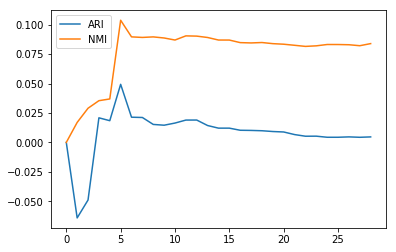

In [151]:
aris, nmis = [], []
for i in range(1, 30):
    agg = AgglomerativeClustering(n_clusters=i, linkage='ward')
    agg.fit(X_scaled)
    ari = adjusted_rand_score(y_whole, agg.labels_)
    nmi = normalized_mutual_info_score(y_whole, agg.labels_)
    aris.append(ari)
    nmis.append(nmi)
plt.plot(aris, label="ARI")
plt.plot(nmis, label="NMI")
plt.legend()
plt.show()

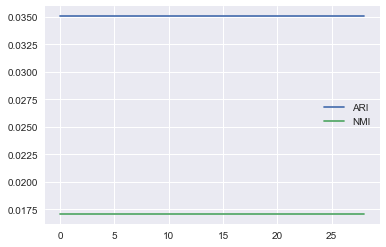

In [219]:
aris, nmis = [], []
for i in range(1, 30):
    dbscan = DBSCAN(min_samples=4, eps=2)
    dbscan.fit_predict(X_scaled)
    ari = adjusted_rand_score(y_whole, abs(dbscan.labels_))
    nmi = normalized_mutual_info_score(y_whole, abs(dbscan.labels_))
    aris.append(ari)
    nmis.append(nmi)
plt.plot(aris, label="ARI")
plt.plot(nmis, label="NMI")
plt.legend()
plt.show()

I'm similarly not sure what is happening with the agglomerative clustering or dbscan scores - both are very low and seemingly nonsensical. I would hope/assume the scores were higher, considering that I don't think I did anything wrong in the model fit/prediction. With regard to model parameter tuning, even though we did it manually in this part, I think you could probably tune using GridSearch to get the best parameters for the model.

### Task 3: Outlier Detection

#### 3.1 Assume that you know the proportion of outliers. Use EllipticEnvelope, OneClassSVM and IsolationForest to detect outliers. 
Without using the ground-truth, can you tell which one gave the best results? Why?

#### EllipticEnvelope

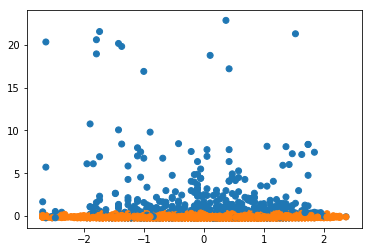

In [193]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=.1).fit(X_scaled)
ee_pred = ee.predict(X_scaled)
ee_scores = ee.decision_function(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=plt.cm.Vega10(ee_pred))
plt.show()

EllipticEnvelope seems to do a good job of isolating outliers from inliers, on a visual level. Any point with vertical distance from 0 is marked as an outlier.

#### OneClassSVM

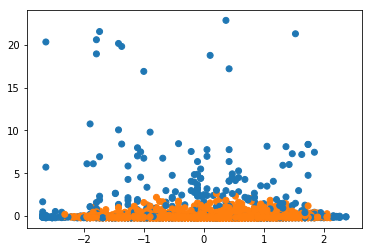

In [197]:
from sklearn.svm import OneClassSVM

oneclass = OneClassSVM(nu=.1).fit(X_scaled)
svm_pred = oneclass.predict(X_scaled).astype(np.int)
svm_scores = oneclass.decision_function(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=plt.cm.Vega10(svm_pred))
plt.show()

OneClassSVM seems to take a slightly different approach and you can see that outliers are now also being found at a certain horizontal distance from 0. This method seems similarly effective on a visual level.

#### IsolationForest

/Users/priyamedberry/scikit-learn/sklearn/ensemble/iforest.py:158: DeprecationWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  DeprecationWarning)


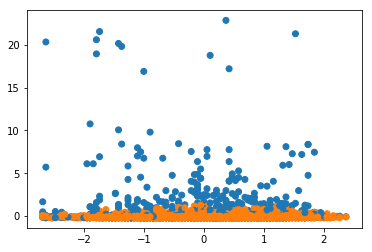

In [199]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest().fit(X_scaled)
if_pred = iso.predict(X_scaled)
if_scores = iso.decision_function(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=plt.cm.Vega10(if_pred))
xlim = plt.xlim()
ylim = plt.ylim()
plt.show()

IsolationForest appears to be more similar to EllipticEnvelope in the way that it detects outliers at a horizontal and vertical distance from the center of the cluster of inliers. There appears to be a bit more noise at the bottom left and right of the graph though, which suggests that EllipticEnvelope likely does a better job of identifying outliers than IsolationForest. Intuitively, I would argue that EllipticEnvelope does a better job of identifying outliers than OneClassSVM as well because the heavy weighting of horizontal distance in OneClassSVM doesn't make that much sense to me. Thus, I would argue that EllipticEnvelope gives the best results.

#### 3.2 Use the ground-truth to evaluate the different outlier detection approaches using AUC and average precision. 
How can you compare their quality to the clustering approaches from Task 2?

In [202]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_invert = np.array(list(map(lambda x: 1 - x, y_whole)))


ap_ee = average_precision_score(y_invert, ee_scores)
ap_svm = average_precision_score(y_invert, svm_scores)
ap_if = average_precision_score(y_invert, if_scores)
print("Average precision of elliptic envelope: {:.3f}".format(ap_ee))
print("Average precision of one class svm: {:.3f}".format(ap_svm))
print("Average precision of isolation forest: {:.3f}".format(ap_if))

Average precision of elliptic envelope: 0.993
Average precision of one class svm: 0.931
Average precision of isolation forest: 0.982


In [203]:
auc_ee = roc_auc_score(y_invert, ee_scores)
auc_svm = roc_auc_score(y_invert, svm_scores)
auc_if = roc_auc_score(y_invert, if_scores)
print("AUC of elliptic envelope: {:.3f}".format(auc_ee))
print("AUC of one class svm: {:.3f}".format(auc_svm))
print("AUC of isolation forest: {:.3f}".format(auc_if))

AUC of elliptic envelope: 0.919
AUC of one class svm: 0.603
AUC of isolation forest: 0.817


Analysis of AUC and average precision shows an agreement with my assessment that EllipticEnvelope was the best at outlier detection. If my scores from Task 2 were more comprehensible, I would compare their quality at number of clusters = 2 (because that's the default setting for the outlier detection models).

### Task 4: Imbalanced Classification

Treat the problem as an imbalanced classification problem using LogisticRegression and RandomForestClassifier. Compare your results with the outlier detection in terms of AUC and average precision. Tune C and a regularization mechanism for the random forest. Does changing the class-weight to “balanced” help?

#### Logistic Regression

In [201]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_whole, y_whole, random_state=0)
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train, y_train)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class="multinomial", solver="lbfgs"))
param_grid_lr = {'logisticregression__C': [0.1, 1, 100]}
grid = GridSearchCV(lr_pipe, param_grid_lr, cv=10)
grid.fit(X_train_subsample, y_train_subsample)
print(grid.best_params_)
scores = cross_validate(lr_pipe, X_train_subsample, y_train_subsample,
                        cv=10, scoring=('roc_auc', 'average_precision'))
print("AUC of logistic regression: {:.3f}".format(scores['test_roc_auc'].mean()))
print("Average precision of logistic regression: {:.3f}".format(scores['test_average_precision'].mean()))

/Users/priyamedberry/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'logisticregression__C': 100}
AUC of logistic regression: 0.981
Average precision of logistic regression: 0.975


The best C is 100, and the AUC and average precision for logistic regression appears very high (higher than IsolationForest and OneClassSVM but not higher than EllipticEnvelope) with the class_weight set to "None".

In [229]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                                            class_weight="balanced"))
param_grid_lr = {'logisticregression__C': [0.1, 1, 100]}
grid = GridSearchCV(lr_pipe, param_grid_lr, cv=10)
grid.fit(X_train_subsample, y_train_subsample)
print(grid.best_params_)
scores = cross_validate(lr_pipe, X_train_subsample, y_train_subsample,
                        cv=10, scoring=('roc_auc', 'average_precision'))
print("AUC of logistic regression: {:.3f}".format(scores['test_roc_auc'].mean()))
print("Average precision of logistic regression: {:.3f}".format(scores['test_average_precision'].mean()))

/Users/priyamedberry/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'logisticregression__C': 100}
AUC of logistic regression: 0.981
Average precision of logistic regression: 0.975


There appears to be no difference in scores when we set the class_weight to "balanced", thus it does not help the fit nor hurt it.

#### Random Forest Classifier

In [231]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
param_grid_rf = {'randomforestclassifier__max_depth':range(1, 7)}
grid = GridSearchCV(rf_pipe, param_grid_rf, cv=10)
grid.fit(X_train_subsample, y_train_subsample)
print(grid.best_params_)
scores = cross_validate(rf_pipe, X_train_subsample, y_train_subsample,
                        cv=10, scoring=('roc_auc', 'average_precision'))
print("AUC of random forest classifier: {:.3f}".format(scores['test_roc_auc'].mean()))
print("Average precision of random forest classifier: {:.3f}".format(scores['test_average_precision'].mean()))

/Users/priyamedberry/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'randomforestclassifier__max_depth': 5}
AUC of random forest classifier: 0.993
Average precision of random forest classifier: 0.987


The random forest classifier performs slightly better than logistic regression with class_weight = 'None'. It also outperforms all the outlier detection methods (or at least is on par with the best trial for EllipticEnvelope).

In [232]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight="balanced"))
param_grid_rf = {'randomforestclassifier__max_depth':range(1, 7)}
grid = GridSearchCV(rf_pipe, param_grid_rf, cv=10)
grid.fit(X_train_subsample, y_train_subsample)
print(grid.best_params_)
scores = cross_validate(rf_pipe, X_train_subsample, y_train_subsample,
                        cv=10, scoring=('roc_auc', 'average_precision'))
print("AUC of random forest classifier: {:.3f}".format(scores['test_roc_auc'].mean()))
print("Average precision of random forest classifier: {:.3f}".format(scores['test_average_precision'].mean()))

/Users/priyamedberry/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'randomforestclassifier__max_depth': 4}
AUC of random forest classifier: 0.991
Average precision of random forest classifier: 0.984


But, when class_weight is set to "balanced", the best parameter for max_depth changes from 5 to 4 and the AUC and average precision decrease a bit, suggesting that setting class_weight to "balanced" does not help the model.